In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
sys.path.append("..")
from train_utils import draw_dynamic

2024-03-11 17:29:35.989739: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 17:29:36.999773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 17:29:39.655712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change 

# ResNet 18

In [3]:
model_folder_30 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/animals/resnet18/"
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet18/"
model_name = 'ResNet 18 3D'

data_30 = [
    {'bs': 1, 'lr':'3*10^(-4)', 'filename': 'ResNet18_animals_lr10-4_bs1_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs8_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs8_loss_acc_dynamic.json'},
]
data_1000 = [
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs1_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-6)', 'filename': 'ResNet18_all_lr10-6_bs1_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-4)', 'filename': 'ResNet18_all_lr10-4_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-6)', 'filename': 'ResNet18_all_lr10-6_bs16_loss_acc_dynamic.json'},
]


batch_sizes_30 = list(set([x['bs'] for x in data_30]))
batch_sizes_30.sort()
batch_sizes_30 = batch_sizes_30 + [0, 0, 0, 0]

batch_sizes_1000 = list(set([x['bs'] for x in data_1000]))
batch_sizes_1000.sort()
batch_sizes_1000 = batch_sizes_1000 + [0, 0, 0, 0]

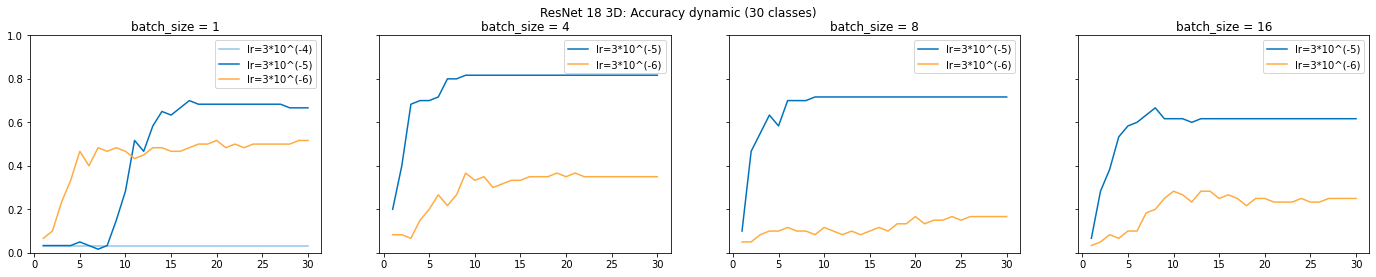

In [4]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='val_accuracy_dynamic')

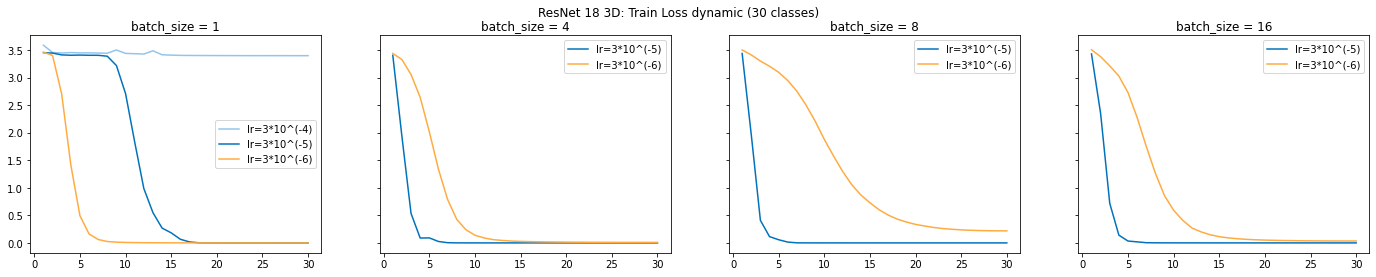

In [5]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='train_loss_dynamic')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


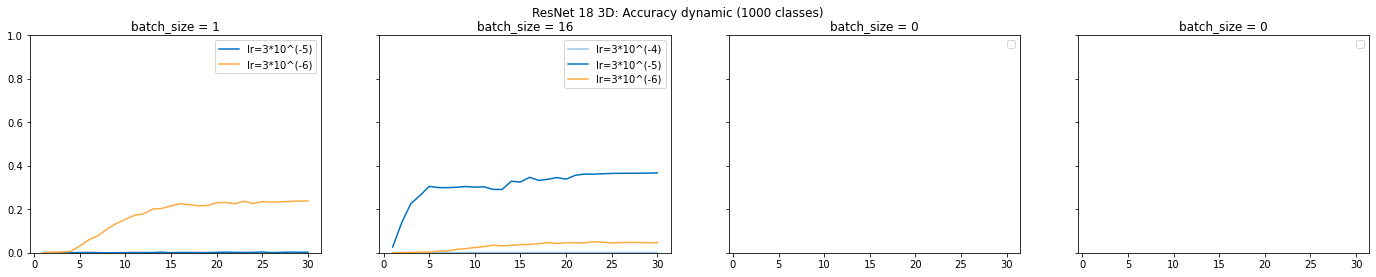

In [6]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='val_accuracy_dynamic')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


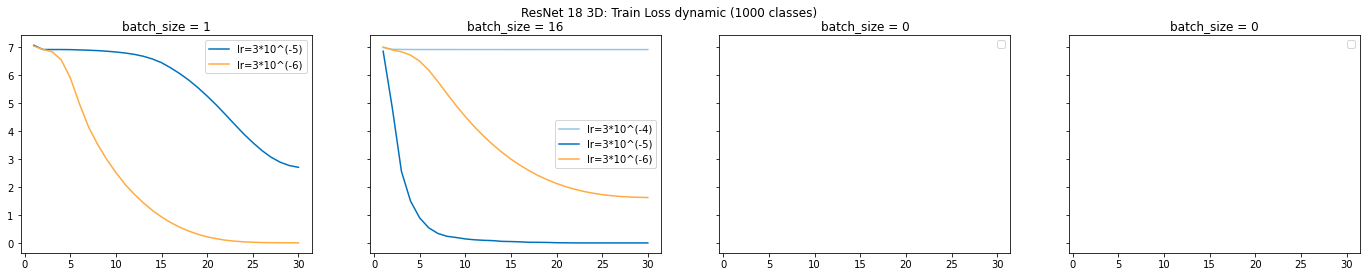

In [7]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='train_loss_dynamic')

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

def draw_augmentations(data, model_folder, model_name, dataset, bs, lr):
  x = np.arange(1, 31, 1)
  title_dict = {'val_accuracy_dynamic': 'Accuracy dynamic',
                'train_loss_dynamic': 'Train Loss dynamic'}
  color_dict = {
      'no augmentation': '#D5E8F7',
      'horizontal flip': '#92C5EB',
      'horizontal flip + perspective transform': '#0072BC',
      'horizontal flip + perspective transform + color jitter': '#FFAB40',
      'horizontal flip + perspective transform + color jitter + bluring': '#5D5D5D',
  } 

  linestyle_dict = {
      'no augmentation': '-',
      'horizontal flip': '-',
      'horizontal flip + perspective transform': '-',
      'horizontal flip + perspective transform + color jitter': '-',
      'horizontal flip + perspective transform + color jitter + bluring': '-',
  }

  def upd_len(some_list, target_size=30):
    cl = len(some_list)
    to_add = [0]*(target_size-cl)
    return some_list + to_add

  fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(24, 8), sharey=False)
    
  ax0.set_ylim(0, 1)
  ax1.set_ylim(0, 10)
  ax0.set_title(f"Accuracy dynamic")
  ax1.set_title(f"Train Loss dynamic")

  for example in data:
    with open(model_folder + example['filename'], 'r') as f:
      dynamic = json.load(f)
      ax0.plot(x, upd_len(dynamic['val_accuracy_dynamic']), label = f"{example['augmentations']}", color = color_dict[example['augmentations']], linestyle = linestyle_dict[example['augmentations']])
      ax1.plot(x, upd_len(dynamic['train_loss_dynamic']), label = f"{example['augmentations']}", color = color_dict[example['augmentations']], linestyle = linestyle_dict[example['augmentations']])

  fig.suptitle(f"{model_name}: {dataset}, batch_size={bs}, lr={lr}")
  ax0.legend()
  ax1.legend()
  plt.show()

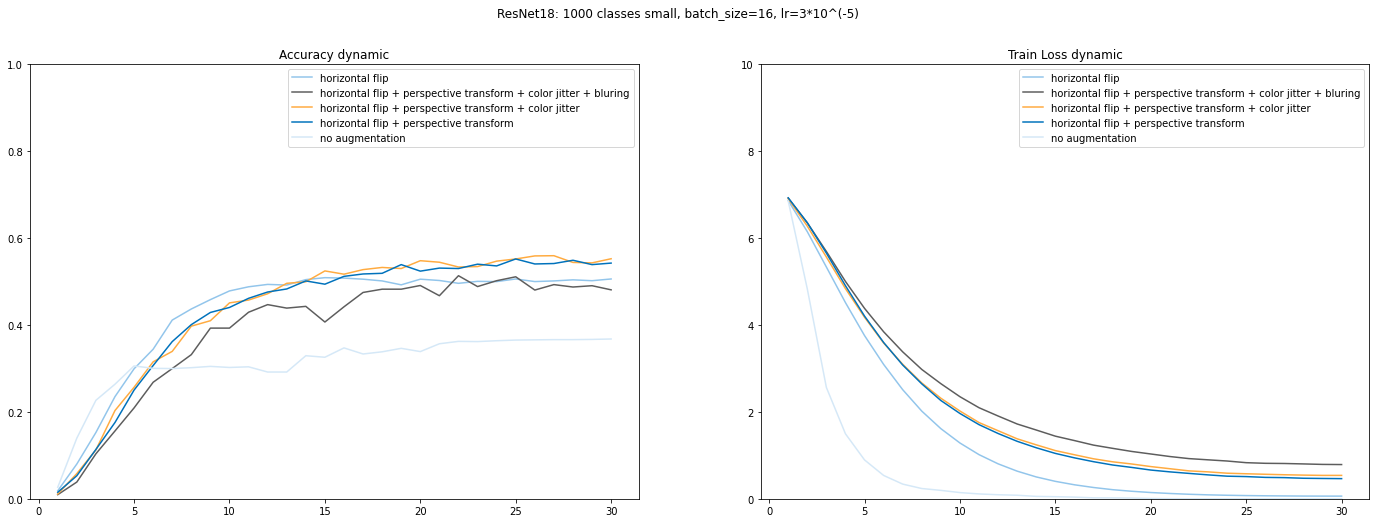

In [9]:
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet18/"
model_name = 'ResNet18'
data = [
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_flip_loss_acc_dynamic.json', 'augmentations': 'horizontal flip'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_flip_pt_col_blur_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform + color jitter + bluring'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_flip_pt_col_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform + color jitter'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_flip_pt_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_loss_acc_dynamic.json', 'augmentations': 'no augmentation'},
]

draw_augmentations(data, model_folder=model_folder_1000, model_name=model_name, dataset='1000 classes small', bs=16, lr = '3*10^(-5)')

# ResNet 50

In [10]:
model_folder_30 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/animals/resnet50/"
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet50/"
model_name = 'ResNet 50 3D'

data_30 = [
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_animals_lr10-3_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-3)', 'filename': 'ResNet50_animals_lr10-3_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-3)', 'filename': 'ResNet50_animals_lr10-3_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-3)', 'filename': 'ResNet50_animals_lr10-3_bs8_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-4)', 'filename': 'ResNet50_animals_lr10-4_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-4)', 'filename': 'ResNet50_animals_lr10-4_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-4)', 'filename': 'ResNet50_animals_lr10-4_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-4)', 'filename': 'ResNet50_animals_lr10-4_bs8_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet50_animals_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet50_animals_lr10-5_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-5)', 'filename': 'ResNet50_animals_lr10-5_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-5)', 'filename': 'ResNet50_animals_lr10-5_bs8_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-6)', 'filename': 'ResNet50_animals_lr10-6_bs1_loss_acc_dynamic.json'},
]

data_1000 = [
    {'bs': 16, 'lr':'3*10^(-2)', 'filename': 'ResNet50_all_lr10-2_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs1_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-4)', 'filename': 'ResNet50_all_lr10-4_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-4)', 'filename': 'ResNet50_all_lr10-4_bs1_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet50_all_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet50_all_lr10-5_bs1_loss_acc_dynamic.json'},
]

batch_sizes_30 = list(set([x['bs'] for x in data_30]))
batch_sizes_30.sort()
batch_sizes_30 = batch_sizes_30 + [0, 0, 0, 0]

batch_sizes_1000 = list(set([x['bs'] for x in data_1000]))
batch_sizes_1000.sort()
batch_sizes_1000 = batch_sizes_1000 + [0, 0, 0, 0]

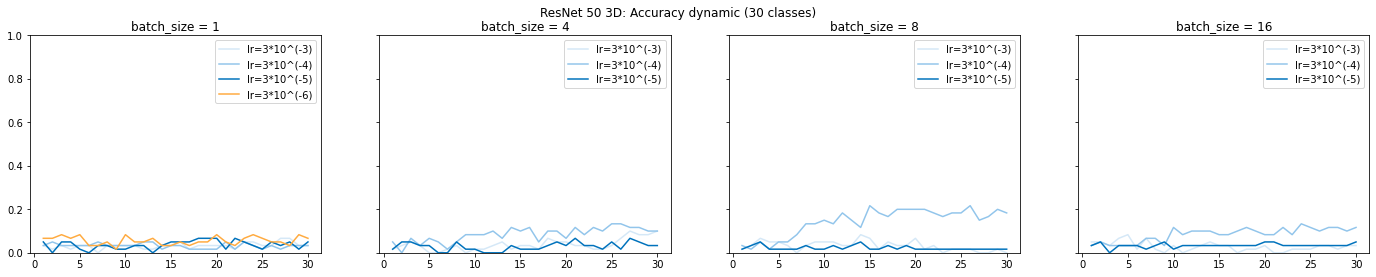

In [11]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='val_accuracy_dynamic')

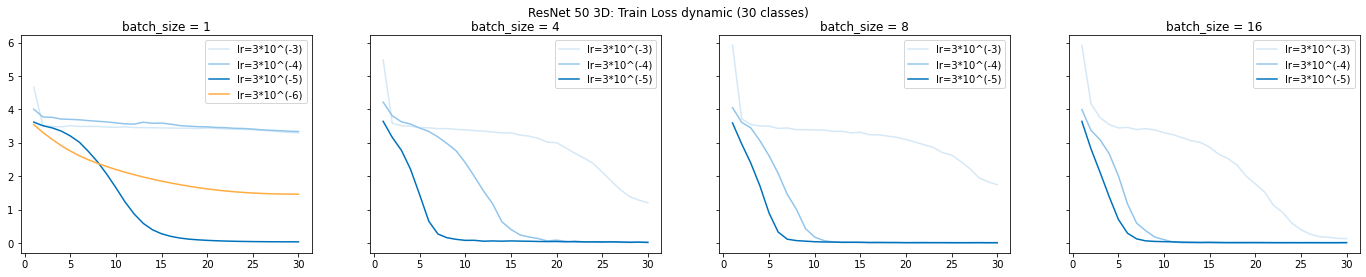

In [12]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='train_loss_dynamic')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


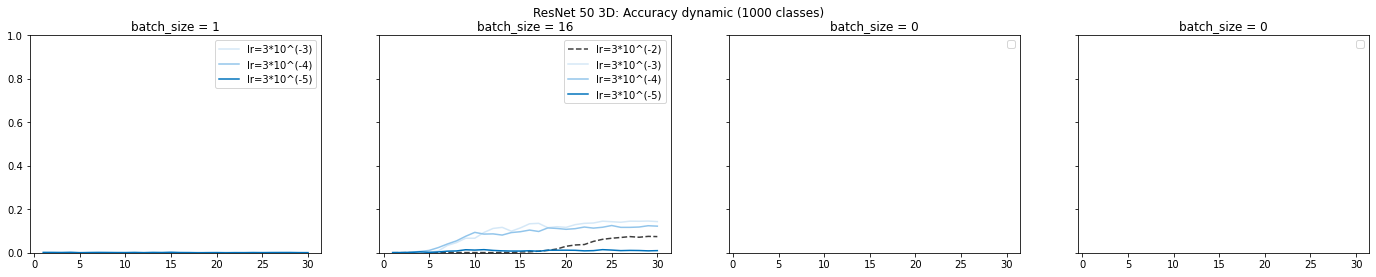

In [13]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='val_accuracy_dynamic')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


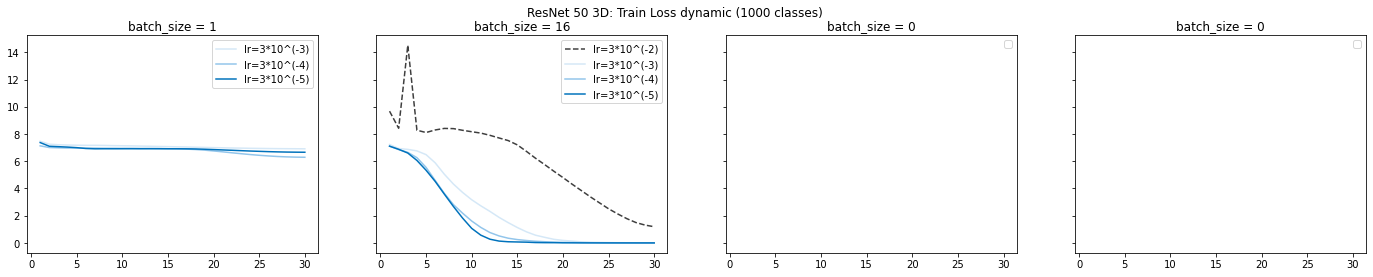

In [14]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='train_loss_dynamic')

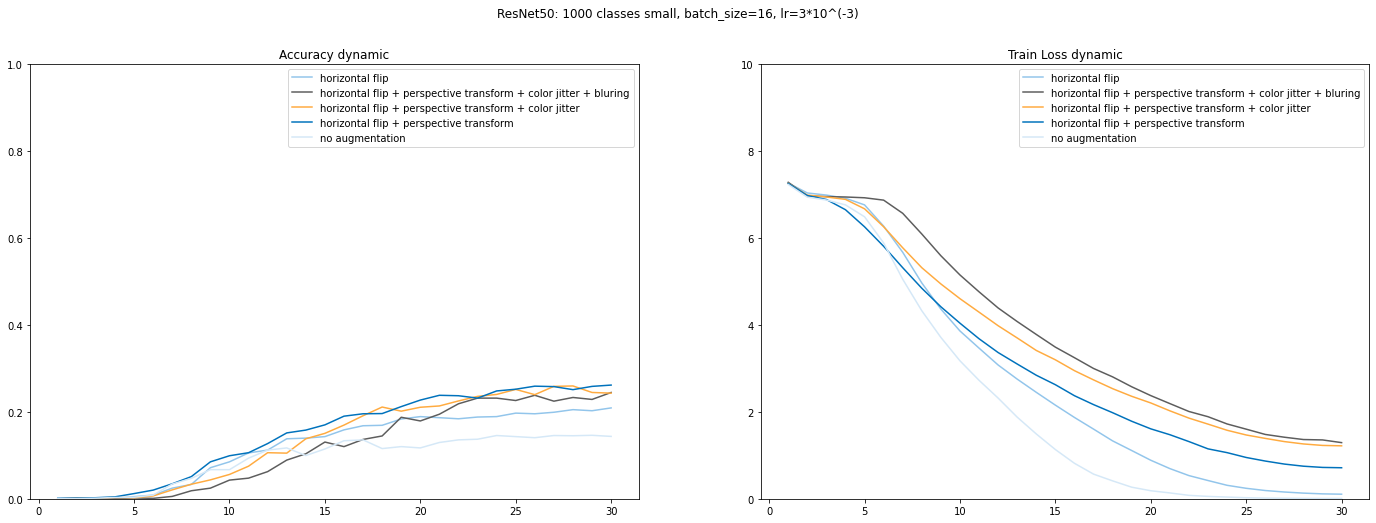

In [15]:
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet50/"
model_name = 'ResNet50'
data = [
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_flip_loss_acc_dynamic.json', 'augmentations': 'horizontal flip'},
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_flip_pt_col_blur_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform + color jitter + bluring'},
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_flip_pt_col_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform + color jitter'},
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_flip_pt_loss_acc_dynamic.json', 'augmentations': 'horizontal flip + perspective transform'},
    {'bs': 16, 'lr':'3*10^(-3)', 'filename': 'ResNet50_all_lr10-3_bs16_loss_acc_dynamic.json', 'augmentations': 'no augmentation'},
]

draw_augmentations(data, model_folder=model_folder_1000, model_name=model_name, dataset='1000 classes small', bs=16, lr = '3*10^(-3)')